# Project:

> Complete the project in a single notebook called project.ipynb in your repository. The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits. Use plots as appropriate.

> In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.

> Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:

>> Download and save the dataset to your repository.

>> Describe the data set in your notebook.

>> Describe what a t-test is, how it works, and what the assumptions are.

>> Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

>> Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

>> Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

## Introduction:

>The **Plangrowth Dataset** is an experiment that contains the weight of $30$ plants sepparated in three groups of $10$ samples each:     
- The **control group (ctrl)** represents plants grown without any additional treatment.
- The **experimental groups (trt1 and trt2)** receive different treatments, and their plant weights are compared against the control group to assess the impact of the treatments.

>Download the **Plant Growth dataset** and save as csv file:   
>Link: https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/datasets/PlantGrowth.csv

## Analysis:

In [4]:
# Import Pandas 
import pandas as pd

# Import numpy
import numpy as np

# Import Matplotlib
import matplotlib.pyplot as plt

# Import Seaborn for plotting and data visualization
import seaborn as sns

# Statistical fucntions
import scipy.stats as stats

# Mathematical functions
import math

# To perform one-way ANOVA test
from scipy.stats import f_oneway



In [5]:
# Extract the data from the column "Wheight" and create three columns based on the group types
# Link: https://stackoverflow.com/questions/16503560/read-specific-columns-from-a-csv-file-with-csv-module 

# No header
# Link: https://stackoverflow.com/questions/29287224/pandas-read-in-table-without-headers
data = pd.read_csv('PlantGrowth.csv', header=None)

# Separate table in three groups ctrl, trt1, trt2
# Link: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
ctrl = data.iloc[1:11, 1:2] 
trt1 = data.iloc[11:21, 1:2]
trt2 = data.iloc[21:31, 1:2]

<AxesSubplot:>

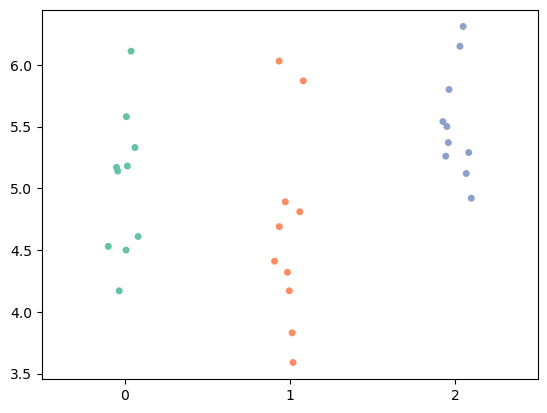

In [6]:
# Create a strip plot using seaborn for a better data representation: 
# Link: https://seaborn.pydata.org/generated/seaborn.color_palette.html  
#       https://seaborn.pydata.org/generated/seaborn.stripplot.html 

sns.stripplot(data = [ctrl,trt1,trt2], palette =('Set2'))



> In the corresponding plot, we observe the following trends:

>> $Ctrl:$ The plant weights range between $4.2$ and $6.2$.  
>> $Trt1:$ This group shows some lower weights ranging from $3.5$ to $6$, with a noticeable gap in values between $5$ and $6$.  
>> $Trt2:$ The weights in this group are higher, ranging between $5$ and $6.3$.  


<AxesSubplot:>

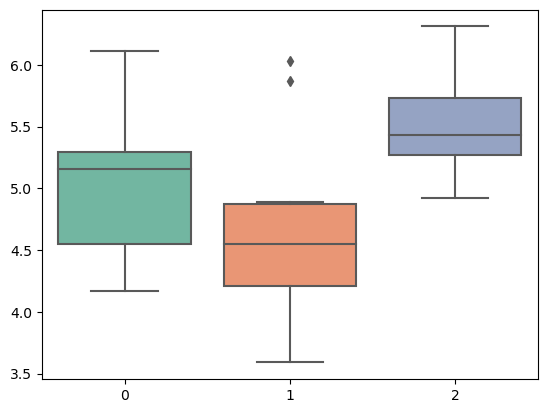

In [7]:
# create a boxplot to represent the data
# Link : https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(data = [ctrl,trt1,trt2], palette=('Set2'))

> In this analysis of the boxlot, we observe distinctive patterns across the groups:

>> For the $Ctrl$ group, the median bisects the interquartile to two ranges, representing the middle $50%$ of the dataset into two quartiles. The upper quartile spans from $5.1$ to $5.3$, while the lower quartile extends from $5.1$ to $4.6$. The distribution suggests a median data tendency around $5.2$.

>> In the case of the $Trt1$ group, the median is closely aligned with the center of the box, indicating a balanced distribution within the IQR, with a median value approximately at $4.5$. This visualization shows that there are only two measures extending beyond $4.9$, reaching up to $5.8$ and $6.0$, respectively. Moreover, $Ctrl1$ records the minimum value observed in the dataset.

>> For the $Trt2$ group, the median is slightly lower within the box, signifiying that a majority of the data within the IQR is concentrated towards the lower end or $Q1$, primarly between $5.3$ and $5.4$.   
Outside the IQR, there are data points extending up to $6.2$, marking the maximum value recorded in the dataset for the PlantGrowth dataset.  

Link: https://www.atlassian.com/data/charts/box-plot-complete-guide


## Performing the t-test

> The **independent t-test**, also called the **two sample t-test**, independent-samples t-test or student's t-test, is an inferential statistical test that determines whether there is a statistically significant difference between the means in two unrelated groups.  
> The **dependent t-test** (also called the **paired t-test** or **paired-samples t-test**) compares the means of two related groups to determine whether there is a statistically significant difference between these means. Since our meassures compare the means of groups that are independent from one another, we will be using the two sample t-test.

> The null hypothesis for the independent t-test is that the plant weight means from the two unrelated groups are equal: $$H0: u1 = u2$$
> Most often, our objective is to demonstrate that the groups are different, that is, rejecting the $H0$ hypothesis: $$HA: u1 ≠ u2$$  
> To do this, we need to set a significance level (also called alpha) that allows us to either reject or accept the alternative hypothesis. Most commonly, this value is set at $0.05$.  $$alpha=0.05$$
>  **Alpha** represents the probability of obtaining your results due to chance. The smaller this value is, the more “unusual” the results. Commonly, this value is set to 0.05 (or 5%), but can take on any value chosen by the research not exceeding $0.05$.
> This test for homogeneity of variance provides an **F-statistic** and a significance value **p-value**. If the pvalue is greater than $0.05$ (i.e., $p > .05$), our group variances can be treated as equal and we can accept the $H0$ hypothesis. However, if $p < 0.05$, we have unequal variances and we have violated the assumption of homogeneity of variances.


Link:  
https://resources.nu.edu/statsresources/alphabeta#:~:text=Alpha%20is%20also%20known%20as,being%20compared%20to%2C%20for%20example.  
https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php  
https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php 

> When attempting to perform the t-test, I realized that the DataFrames I had created were not in the correct format for the statistical function. To identify the type of data I was working with, I used $print(type(trt1))$ and realized it was a $str$. After confirming the issue, I converted the DataFrames into arrays using NumPy to ensure compatibility with the t-test function.


In [8]:
print(type(trt1))

ctrl = np.fromstring('4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14', sep =',' )
trt1 = np.fromstring('4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69', sep =',' )
trt2 = np.fromstring('6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26', sep =',' )

# Link: https://numpy.org/doc/2.1/reference/generated/numpy.fromstring.html#numpy-fromstring 

<class 'pandas.core.frame.DataFrame'>


### $n$ samples

In [9]:
# Considering we have three samples:
n = 3

# Show the sample labels 
print(list(range(3)))

# Number of ways of selecting two samples from n
math.comb(n, 2)

[0, 1, 2]


3

For $3$ samples, we can perform $3$ t-tests:
 
[ctrl, trt1]  
[ctrl, trt2]  
[trt1, trt2] 

In [10]:
# Independent samples t-test on sample_a and sample_b
# Link: https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/#:~:text=than%204%3A1.-,Performing%20Two%2DSample%20T%2DTest,Python3,-%23%20Python%20program%20to 
t_statistic, pvalue = stats.ttest_ind(ctrl,trt1)

alpha = 0.05
if pvalue < alpha:
    print(f"The pvalue equals {pvalue}. We reject the null hypothesis as there is a significant difference between the Ctrl and Trt1 sample.")
else:
    print(f"The pvalue equals {pvalue}. We fail to reject the null hypothesis as there is no significant difference between the Ctrl and Trt1 sample.")

# Link: https://builtin.com/data-science/t-test-python 

The pvalue equals 0.2490231659730067. We fail to reject the null hypothesis as there is no significant difference between the Ctrl and Trt1 sample.


> When comparing the $Ctrl$ sample with the $Trt1$, there is insufficient evidence to reject $H0$. If they would turn out to be different, it would be likely due to random chance. In the context of a t-test, it means the two groups being compared are not significantly different.

In [11]:
# Independent samples t-test on sample_a and sample_b
t_statistic, pvalue = stats.ttest_ind(ctrl,trt2)

# Show
t_statistic, pvalue

alpha = 0.05
if pvalue < alpha:
    print(f"The pvalue equals {pvalue}. We reject the null hypothesis as there is a significant difference between the Ctrl and Trt2 sample.")
else:
    print(f"The pvalue equals {pvalue}. We fail to reject the null hypothesis as there is no significant difference between the Ctrl and Trt2 sample.")

# Link: https://builtin.com/data-science/t-test-python 

The pvalue equals 0.04685138491157358. We reject the null hypothesis as there is a significant difference between the Ctrl and Trt2 sample.


> When comparing the $Ctrl$ sample with the $Trt2$, there is enough evidence to reject $H0$, at the 5% significance level. The difference between the two groups is statistically significant, meaning it is unlikely to be due to random chance.

In [12]:
# Independent samples t-test on sample_a and sample_b
t_statistic, pvalue = stats.ttest_ind(trt1,trt2)

# Show
t_statistic, pvalue

alpha = 0.05
if pvalue < alpha:
    print(f"The pvalue equals {pvalue}. We reject the null hypothesis as there is a significant difference between the Trt1 and Trt2 sample.")
else:
    print(f"The pvalue equals {pvalue}. We fail to reject the null hypothesis as there is no significant difference between the Trt1 and Trt2 sample.")

# Link: https://builtin.com/data-science/t-test-python 

The pvalue equals 0.0075184261182198574. We reject the null hypothesis as there is a significant difference between the Trt1 and Trt2 sample.


> There is strong evidence against the null hypothesis $H0$ when comparing the samples $Trt1$ and $Trt2$. The observed difference is highly unlikely to be due to random chance, which suggests a significant difference.

> **T-tests** are primarily designed to compare the means of **two groups**. For datasets with multiple groups, other statistical methods are more appropriate, such as analysis of variance (ANOVA), Tukey-Kramer pairwise comparisons, Dunnett's test (for comparing groups against a control), or analysis of means (ANOM). 

> Based on the assignment guidelines, we will proceed with the **ANOVA** method for this analysis.

Link: 
https://pmc.ncbi.nlm.nih.gov/articles/PMC6813708/ 

## ANOVA test

In [13]:
import scipy.stats as stats

stats.f_oneway(ctrl,trt1,trt2)

alpha = 0.05
if pvalue < alpha:
    print(f"The p-value is {pvalue}. Therefore, we reject the null hypothesis, indicating a significant difference among the three samples.")
else:
    print(f"The pvalue equals {pvalue}. Therefore, we fail to reject the null hypothesis as there is no significant difference among the three samples.")

# Link: https://www.statology.org/one-way-anova-python/ 

The p-value is 0.0075184261182198574. Therefore, we reject the null hypothesis, indicating a significant difference among the three samples.


> As we can see, the result of the ANOVA test for the three groups yielded a p-value of $0.0075184261182198574$. Since this p-value is less than the significance level ($α$, typically $0.05$), we can confidently reject the null hypothesis $𝐻0$. This indicates that there is a statistically significant difference among the means of the three groups.

> Whereas ANOVA (e.g. f_oneway) assesses whether the true means underlying each sample are identical, **Tukey’s HSD** is a post hoc test used to compare the mean of each sample to the mean of each other sample (pairwise comparison).

> **Post hoc** analysis is necessary to determine which groups are significantly different from each other after conducting ANOVA tests. In simpler terms, post hoc analysis helps researchers determine which groups are responsible for the significant differences observed in ANOVA tests. This is essential for making informed decisions and drawing accurate conclusions from research data. Post hoc analysis is important for several reasons:
>> First, it helps to avoid **Type I errors**, which occur when a researcher rejects the null hypothesis when it is true. It helps to identify which groups are significantly different from each other, reducing the likelihood of falsely rejecting the null hypothesis.  
>> Second, post hoc analysis helps to identify which groups are most important in driving the observed differences. This information can be used to develop targeted interventions or treatments for specific groups, based on their unique characteristics.

Links:  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html#tukey-hsd  
https://fastercapital.com/content/Tukey-s-HSD--Post-Hoc-Analysis-after-ANOVA.html#Significance-of-Post-Hoc-Analysis 

In [14]:
# Calculate Tukey HSD using SciPy:

results = stats.tukey_hsd(ctrl,trt1,trt2)
print(results)

# Link: https://www.youtube.com/watch?v=XwgWnKvmRgU

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.371     0.391    -0.320     1.062
 (0 - 2)     -0.494     0.198    -1.185     0.197
 (1 - 0)     -0.371     0.391    -1.062     0.320
 (1 - 2)     -0.865     0.012    -1.556    -0.174
 (2 - 0)      0.494     0.198    -0.197     1.185
 (2 - 1)      0.865     0.012     0.174     1.556



## P-value Breakdown:  

Comparison $(0 - 1)$: $p=0.391$
- The p-value is greater than the common significance level $(α=0.05)$ which indicates here is no significant difference between groups $Ctrl$ and $Trt1$. The observed difference is likely due to random chance.    

Comparison $(0 - 2)$:  $p=0.198$    
- The p-value is also greater than $0.05$, hence, there is no significant difference between groups $Ctrl$ and $Trt2$. Again, the results suggest no meaningful distinction in means.  

Comparison $(1 - 0):$ $p=0.391$  
- This is the same as $(0 - 1)$, just reversed. The result is the same: no significant difference between $Trt1$ and $Ctrl$.  

Comparison $(1 - 2)$: $p=0.012$  
- The p-value is less than $0.05$, indicating a significant difference between $Trt1$ and $Trt2$.  

Comparison $(2 - 0)$: $p=0.198$  
- Similar to (0 - 2), the p-value is greater than $0.05$, we can confirm the is no significant difference between $Trt2$ and $Ctrl$.  

Comparison $(2 - 1)$: $p=0.012$  
- This is the reverse of (1 - 2) and confirms the same result. A significant difference exists between $Trt2$ and $Trt1$.  

> **Summary:**  
>> The only significant difference (at $α=0.05$) is between the treated samples $Trt1$ and $Trt2$ (p=0.012).  
There are no significant differences between the $Ctrl$ and either treatment group (1 or 2).  

>> These findings suggest that $Trt1$ and $Trt2$ have distinct effects on the plant weights, while the $Ctrl$ does not differ significantly from either treatment.  